<h1>Importing the packages</h1>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import seaborn as sns
import numpy as np

<h1>Importing the data</h1>

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


<h1>Exploratory data analysis</h1>

1)Checking null values

In [4]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

2)Removing unwanted data for prediction

In [5]:
upd_data=data.drop(['name',],axis=1)

In [6]:
upd_data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443
...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880
394,2,4,97.0,52,2130,24.6,1982,18.706323
395,1,4,135.0,84,2295,11.6,1982,13.604599
396,1,4,120.0,79,2625,18.6,1982,11.904024


In [7]:
upd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


3)Removing the unknown values as '?' in Horsepower attribute 

In [8]:
upd_data.horsepower=upd_data.horsepower.replace('?',None)

In [9]:
upd_data.horsepower=upd_data.horsepower.astype('int64')

In [10]:
upd_data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443
...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880
394,2,4,97.0,52,2130,24.6,1982,18.706323
395,1,4,135.0,84,2295,11.6,1982,13.604599
396,1,4,120.0,79,2625,18.6,1982,11.904024


4)Creating the Dummy variables for Discrete Values

In [11]:
dummy = pd.get_dummies(upd_data,columns=['origin','year'])

In [12]:
dummy['log_mileage'] = np.log(dummy.Kilometer_per_liter)

<h1>Scaling the data</h1>

In [15]:
scaled = StandardScaler().fit(dummy)

In [16]:
scs = scaled.transform(dummy)

In [17]:
sds = pd.DataFrame(scs)

In [18]:
sds.columns = dummy.columns
sds

,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter,origin_1,origin_2,origin_3,year_1970,...,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,log_mileage
0,1.498191,1.090604,0.675133,0.630870,-1.295498,-0.706439,0.773559,-0.461968,-0.497643,3.567091,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,-0.290635,-0.622035
1,1.498191,1.503514,1.590245,0.854333,-1.477038,-1.090751,0.773559,-0.461968,-0.497643,3.567091,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,-0.290635,-1.159493
2,1.498191,1.196232,1.198054,0.550470,-1.658577,-0.706439,0.773559,-0.461968,-0.497643,3.567091,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,-0.290635,-0.622035
3,1.498191,1.061796,1.198054,0.546923,-1.295498,-0.962647,0.773559,-0.461968,-0.497643,3.567091,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,-0.290635,-0.969242
4,1.498191,1.042591,0.936593,0.565841,-1.840117,-0.834543,0.773559,-0.461968,-0.497643,3.567091,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,-0.290635,-0.790530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.475293,-0.213324,0.011586,0.446497,0.773559,-0.461968,-0.497643,-0.280340,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,3.440743,0.573219
394,-0.856321,-0.925936,-1.364259,-0.993671,3.279296,2.624265,-1.292726,2.164651,-0.497643,-0.280340,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,3.440743,2.012814
395,-0.856321,-0.561039,-0.527585,-0.798585,-1.440730,1.087017,0.773559,-0.461968,-0.497643,-0.280340,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,3.440743,1.074057
396,-0.856321,-0.705077,-0.658315,-0.408411,1.100822,0.574601,0.773559,-0.461968,-0.497643,-0.280340,...,-0.269771,-0.28552,-0.305625,-0.275092,-0.315353,-0.28034,-0.28034,-0.28034,3.440743,0.680426


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

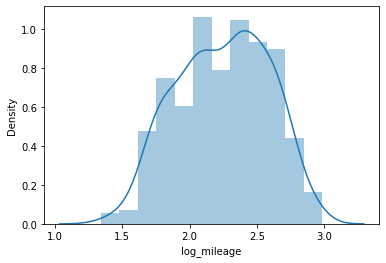

In [21]:
sns.distplot(dummy.log_mileage)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

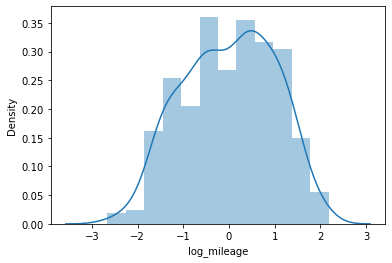

In [20]:
sns.distplot(sds.log_mileage)

In [22]:
dummy = dummy.drop('Kilometer_per_liter',axis=1)
sds = sds.drop('Kilometer_per_liter',axis=1)

<h1>Separating the dataset</h1>

In [26]:
x = sds.iloc[0:,0:21]
y = sds.iloc[0:,21]

In [27]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.2)

<h1>Model Creation</h1>

In [28]:
lin = LinearRegression().fit(trainx,trainy)

In [29]:
lin.score(testx,testy)

0.9030431479101537

In [31]:
pred_y = lin.predict(testx)

In [32]:
mean_squared_error(pred_y,testy)

0.0919372045311242